In [1]:

import keras
import numpy as np
from keras.applications import vgg16, inception_v3, resnet50, mobilenet
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [2]:

vgg_model = vgg16.VGG16(weights='imagenet')


553467904/553467096 [==============================] - 166s 0us/step


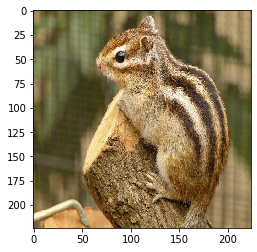

In [8]:
filename = 'pic.jpg'
org = load_img(filename, target_size=(224,224))
img = img_to_array(org)
plt.imshow(np.uint8(img))


In [9]:
img.shape

(224, 224, 3)

In [10]:
x = np.expand_dims(img, axis=0)

In [11]:
# print encoding status of prediction
x = vgg16.preprocess_input(x)
pred = vgg_model.predict(x)
print(pred)

[[2.27141427e-07 5.39352322e-06 7.61227597e-08 1.02406638e-07
  1.48393696e-07 3.40306578e-05 4.54701791e-07 5.57584826e-05
  2.62768997e-04 2.29993657e-05 8.49024300e-03 2.08237136e-04
  1.11063092e-03 5.50468161e-04 5.66007511e-04 4.13419068e-04
  8.88127615e-05 1.25664941e-04 2.82035562e-05 1.81186333e-04
  8.06686076e-05 7.77774403e-05 1.51899656e-06 9.95390747e-06
  1.56719834e-04 3.27658454e-05 1.09111529e-03 2.64157192e-04
  1.37204970e-05 8.75042169e-04 1.89319835e-04 1.85563101e-03
  4.34633484e-03 2.92001187e-06 2.97149927e-06 7.80500977e-06
  2.97531187e-05 1.88084850e-05 1.88616558e-03 1.04183775e-04
  2.88797938e-03 4.00214130e-03 1.57779474e-02 2.84253294e-03
  1.06084778e-03 4.07655425e-05 1.42868923e-03 2.18181428e-03
  1.00589250e-05 4.86146564e-06 8.75933381e-07 2.76379956e-06
  2.24186006e-05 1.76540721e-06 2.01287021e-05 1.10511401e-05
  3.46463139e-06 1.55193611e-05 1.91392064e-06 2.52066566e-05
  3.31020965e-05 7.85980592e-06 1.09679731e-05 2.83527152e-05
  2.7457

In [12]:
# decode
from keras.applications.imagenet_utils import decode_predictions
pred = decode_predictions(pred)
print(pred)

# prediction : 'fox_squirrel', 0.6382825 (여우다람쥐)


40960/35363 [==================================] - 0s 0us/step
[[('n02356798', 'fox_squirrel', 0.6382825), ('n02325366', 'wood_rabbit', 0.10509362), ('n02490219', 'marmoset', 0.0705399), ('n01687978', 'agama', 0.015777947), ('n02326432', 'hare', 0.01544872)]]


In [14]:
vgg_model.summary()

# transfer learning - Fine tuning
# 1. layer -> not trainable -> param should be replaced 0
#   Trainable params: 0
'''for layer in vgg_model.layers:
    layer.trainable = False
vgg_model.summary()'''

# 2. bottleneck feature




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [ ]:
# last Dense layer -> 1000
# 1000 labels are trained
